## INTRODUCTION:
Dataset contain a fuse box with 9 fuses. In the fuse box, there is an OK position
(already given) and other positions are Not Good (NG)

**Fuse Boxes Of Both Classes**
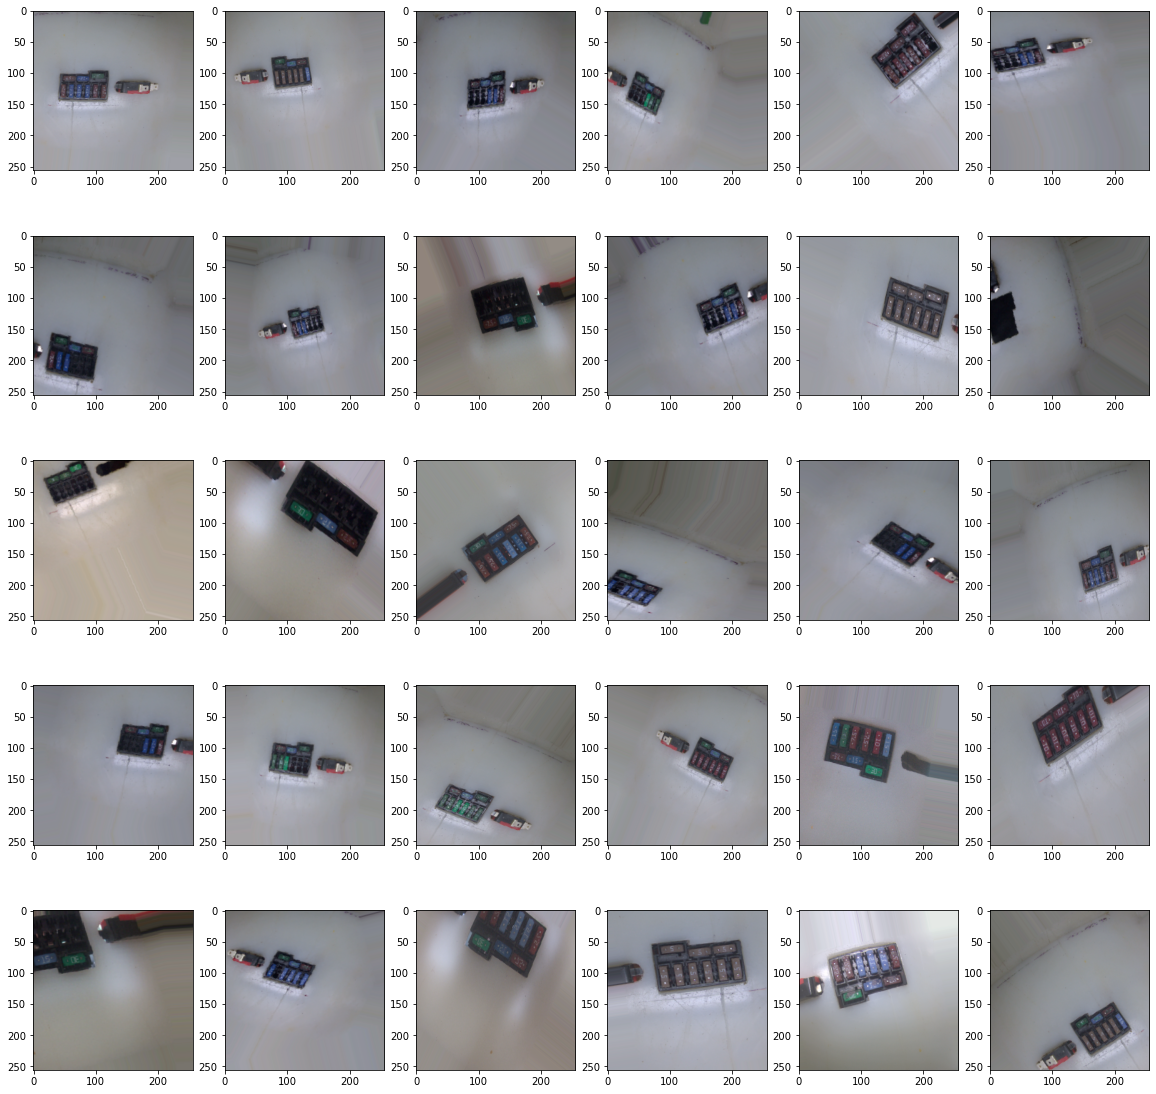



## DATA SUMMARY
* This dataset contain total 353 png images in one folder, so we seprate the classes mannually and make Two folders 'Ok Position' & 'Not Good'

* Generate Some NOt Good Class data mannually with the help of Data Agumentation.

## DEVICE THE PROJECT INTO MULTIPLE STEPS
1. Make subset of training, validation and testing
2. Prepare training, validation and testing set
3. Get all classes labels
5. Visualise training images
6. Used CNN & VGG19 model
7. Model Compilation
8. Model Training
9. Model Evaluation
10. Model Saving
11. Prediction on test data
12. Deploy model using flask frame-work

###  PYTHON IMPLIMENTATION

In [1]:
# Import necessary library
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Lambda, UpSampling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
import os
import cv2

# To avoid warnings

import warnings
warnings.filterwarnings('ignore')

#### MAKE SUBSET OF TRAINING VALIDATION & TESTING

In [2]:
import splitfolders
splitfolders.ratio(r"C:\Users\hp\Downloads\Task\data",output='subset',ratio=(0.70,0.15,0.15),seed=1337)

Copying files: 552 files [00:00, 785.09 files/s]


#### PREPARE TRAINING, TESTING & VALIDATION DATA

In [3]:
# Path of training,validation and testing 
train_dir = r"C:\Users\hp\Downloads\Task\subset\train"
val_dir   = r"C:\Users\hp\Downloads\Task\subset\val"
test_dir  = r"C:\Users\hp\Downloads\Task\subset\test"

In [4]:
train_datagen = ImageDataGenerator(rescale=(1./255),
                                   rotation_range=40,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255),
                                   rotation_range=40,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=(1./255))

In [5]:
train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(256,256),
                                              batch_size =32,
                                              color_mode ='rgb')

val_set = val_datagen.flow_from_directory(val_dir,
                                         target_size=(256,256),
                                         batch_size =32,
                                         color_mode ='rgb')
                                         

test_set = test_datagen.flow_from_directory(test_dir,
                                           target_size=(256,256),
                                           batch_size =32,
                                           color_mode ='rgb')

Found 385 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


* After loading data 385 images for training, 82 images for testing, & 85 images for validation.

### GETTING CLASS LABELS

In [6]:
# Getting the labels of classes
train_set.class_indices 

{'notGoodFuse': 0, 'okPositionFuse': 1}

### VISUALISE TRAINING IMAGES 

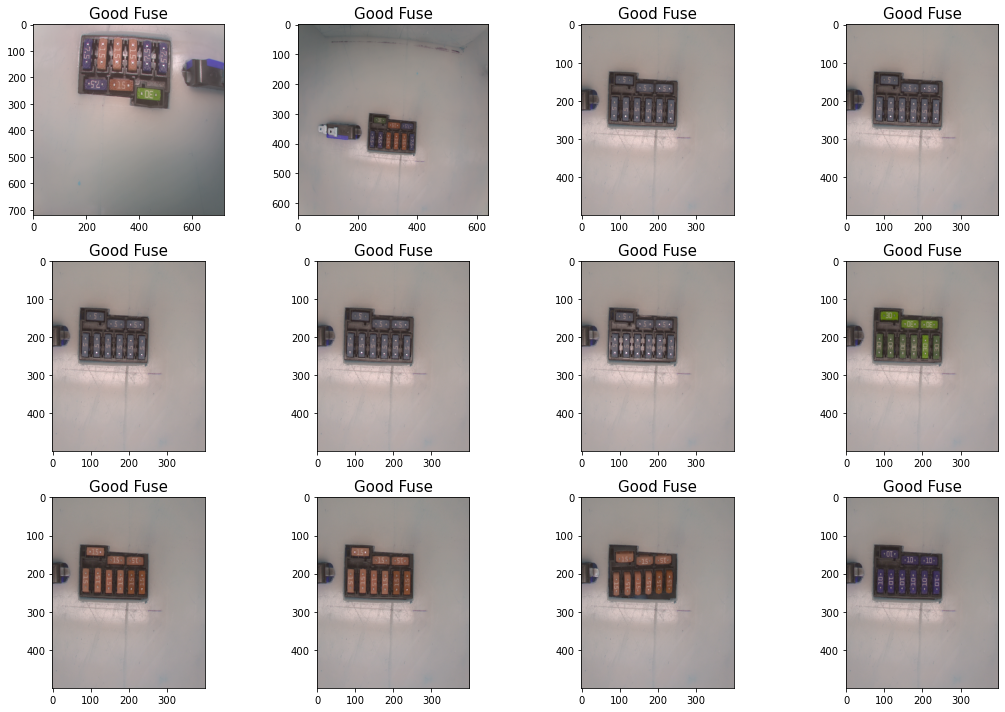

In [7]:
import os
import cv2

good_fuse = os.listdir(r"C:\Users\hp\Downloads\Task\subset\train\okPositionFuse")

plt.figure(figsize=(15,10),facecolor='white')  #Set canvas size
for i in range(12):
    plt.subplot(3,4,i+1)
    img = cv2.imread(r"C:\Users\hp\Downloads\Task\subset\train\okPositionFuse" + '/' + good_fuse[i])
    plt.imshow(img)
    plt.title('Good Fuse',fontsize=15)
plt.tight_layout()

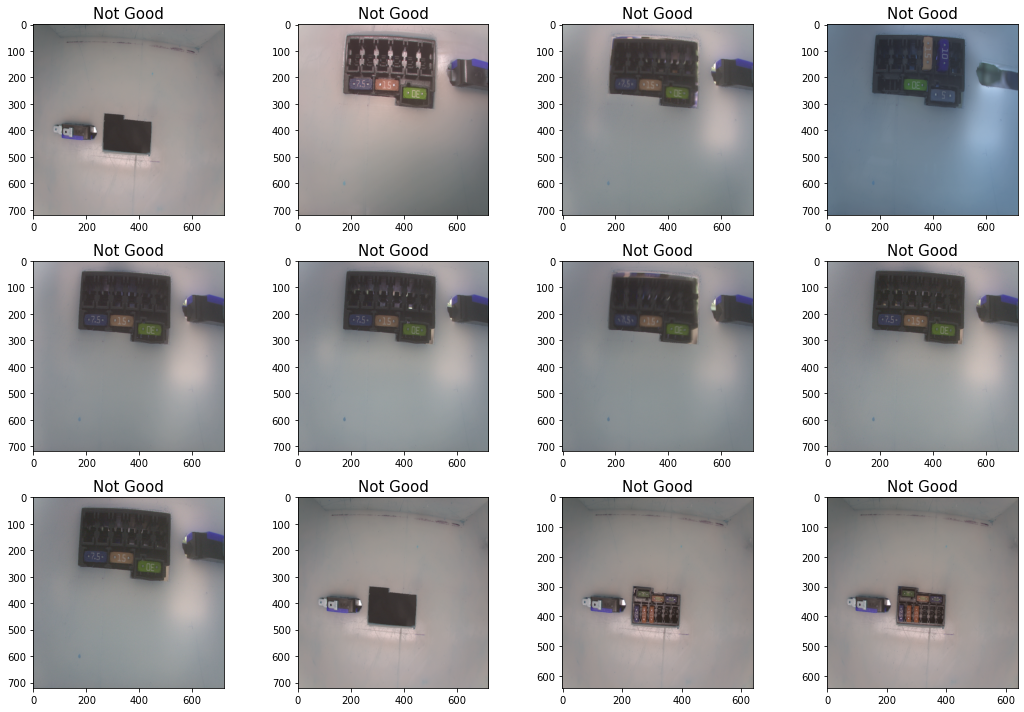

In [8]:
not_good_fuse = os.listdir(r"C:\Users\hp\Downloads\Task\subset\train\notGoodFuse")

plt.figure(figsize=(15,10),facecolor='white')  #Set canvas size
for i in range(12):
    plt.subplot(3,4,i+1)
    img = cv2.imread(r"C:\Users\hp\Downloads\Task\subset\train\notGoodFuse" + '/' + not_good_fuse[i])
    plt.imshow(img)
    plt.title('Not Good',fontsize=15)
plt.tight_layout()

### GETTING THE CLASS WEIGHTS

In [9]:
# Checking the class balance
from sklearn.utils.class_weight import compute_class_weight

train_classes = train_set.classes

class_weights = compute_class_weight("balanced",
                                    classes=np.unique(train_classes),
                                    y=train_classes)
class_weights = dict(zip(np.unique(train_classes), class_weights)),
class_weights

({0: 1.1809815950920246, 1: 0.8671171171171171},)

In [10]:
# Make dictionary of class weight
weights = {0: 1.1809815950920246, 1: 0.8671171171171171}
weights

{0: 1.1809815950920246, 1: 0.8671171171171171}

## BUILD CNN ARCHITECTURE

In [15]:
# Define model
model = Sequential()

model.add(Conv2D(16,kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  # Flatten the Maxpool output

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))


In [16]:
# Get model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)      

### COMPILE MODEL

In [17]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

### MODEL TRAINING

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

check = ModelCheckpoint(filepath='model.weights.best.hdf5', verbos=1, save_best_only=True,monitor='val_loss')

hist = model.fit_generator(train_set,
                           epochs=40, validation_data=val_set,
                           callbacks=[check],
                           verbose=2,
                           class_weight=weights)


Epoch 1/40
13/13 - 16s - loss: 0.7811 - accuracy: 0.5195 - val_loss: 1.2791 - val_accuracy: 0.5732 - 16s/epoch - 1s/step
Epoch 2/40
13/13 - 13s - loss: 0.7816 - accuracy: 0.4753 - val_loss: 1.0604 - val_accuracy: 0.5732 - 13s/epoch - 1s/step
Epoch 3/40
13/13 - 13s - loss: 0.7278 - accuracy: 0.5429 - val_loss: 0.7442 - val_accuracy: 0.6829 - 13s/epoch - 1s/step
Epoch 4/40
13/13 - 14s - loss: 0.7361 - accuracy: 0.5532 - val_loss: 1.2220 - val_accuracy: 0.4268 - 14s/epoch - 1s/step
Epoch 5/40
13/13 - 13s - loss: 0.7311 - accuracy: 0.5351 - val_loss: 0.8041 - val_accuracy: 0.4268 - 13s/epoch - 1s/step
Epoch 6/40
13/13 - 13s - loss: 0.5034 - accuracy: 0.8156 - val_loss: 0.5216 - val_accuracy: 0.6463 - 13s/epoch - 1s/step
Epoch 7/40
13/13 - 14s - loss: 0.3398 - accuracy: 0.8779 - val_loss: 0.3716 - val_accuracy: 0.9634 - 14s/epoch - 1s/step
Epoch 8/40
13/13 - 14s - loss: 0.2532 - accuracy: 0.9221 - val_loss: 0.4104 - val_accuracy: 0.9268 - 14s/epoch - 1s/step
Epoch 9/40
13/13 - 14s - loss: 0

### PLOT ACCURACY & LOSSES

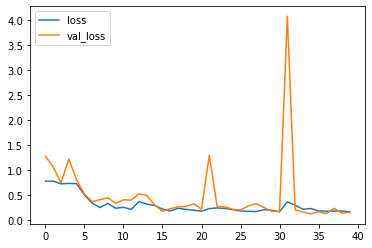

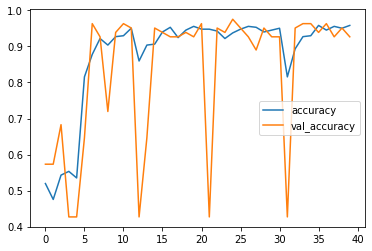

In [19]:
import pandas as pd
hist_df = pd.DataFrame(hist.history)
hist_df.loc[:, ['loss', 'val_loss']].plot()
plt.show()
hist_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

### MODEL EVALUATION

In [20]:
training_accuracy = model.evaluate(train_set)
print('Training Accuracy:',training_accuracy)
testing_accuracy = model.evaluate(test_set)
print('Testing Accuracy:',testing_accuracy)

13/13 [==============================] - 7s 501ms/step - loss: 0.1494 - accuracy: 0.9688
Training Accuracy: [0.1493784338235855, 0.9688311815261841]
3/3 [==============================] - 1s 228ms/step - loss: 0.1359 - accuracy: 0.9412
Testing Accuracy: [0.1358916312456131, 0.9411764740943909]


In [21]:
data = pd.DataFrame(zip(training_accuracy,testing_accuracy), columns=['Train','Test'],index=['Loss','Accuracy'])
data

Train      Test
Loss      0.149378  0.135892
Accuracy  0.968831  0.941176

### PREDICTION ON TEST DATA

In [22]:
y_hat = model.predict(test_set)

3/3 [==============================] - 1s 193ms/step


In [23]:
y_hat

array([[9.05618966e-01, 1.03706226e-01],
       [2.91642517e-01, 7.12307036e-01],
       [5.59213124e-02, 9.47808444e-01],
       [5.55467159e-02, 9.48162138e-01],
       [9.99920964e-01, 5.10425416e-05],
       [9.86649394e-01, 8.92259926e-02],
       [5.60684912e-02, 9.46722686e-01],
       [5.48256338e-02, 9.47902858e-01],
       [8.38949904e-02, 9.24210489e-01],
       [1.02580167e-01, 9.00410533e-01],
       [9.74296391e-01, 2.12817341e-02],
       [1.03456840e-01, 8.99601161e-01],
       [8.34942639e-01, 1.71718314e-01],
       [5.48386350e-02, 9.47891891e-01],
       [5.93866445e-02, 9.43430364e-01],
       [9.90992606e-01, 1.01056825e-02],
       [5.68513423e-02, 9.47125316e-01],
       [5.82953617e-02, 9.46340919e-01],
       [9.99620438e-01, 2.30145466e-04],
       [9.98069227e-01, 9.42307524e-03],
       [8.92223567e-02, 9.13421452e-01],
       [9.92733657e-01, 8.90020467e-03],
       [5.93866445e-02, 9.43430364e-01],
       [9.21457484e-02, 9.20034647e-01],
       [9.834886

### LOAD MODEL & PREDICT RANDOM IMAGE

In [24]:
from tensorflow.keras.models import load_model

model1 = load_model('model.weights.best.hdf5')

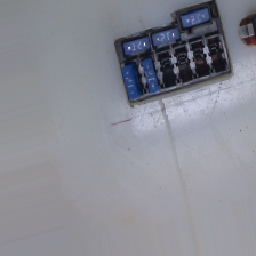

In [44]:
img = image.load_img(r"C:\Users\hp\Downloads\Task\data\notGoodFuse\_0_3214.png",target_size=(256,256))
img

In [45]:
# Convert image into array
array = image.img_to_array(img)
array

array([[[129., 132., 135.],
        [129., 132., 135.],
        [129., 132., 134.],
        ...,
        [120., 123., 137.],
        [120., 124., 137.],
        [118., 121., 133.]],

       [[130., 132., 135.],
        [130., 132., 135.],
        [130., 132., 136.],
        ...,
        [119., 123., 134.],
        [118., 122., 133.],
        [117., 120., 133.]],

       [[130., 132., 136.],
        [130., 132., 135.],
        [130., 132., 135.],
        ...,
        [117., 121., 132.],
        [115., 119., 130.],
        [115., 118., 131.]],

       ...,

       [[144., 142., 151.],
        [144., 142., 151.],
        [144., 142., 151.],
        ...,
        [154., 155., 161.],
        [154., 156., 161.],
        [155., 157., 162.]],

       [[144., 142., 151.],
        [144., 142., 151.],
        [144., 142., 151.],
        ...,
        [154., 155., 161.],
        [154., 155., 161.],
        [155., 157., 162.]],

       [[144., 142., 151.],
        [144., 142., 150.],
        [143., 1

In [46]:
# Scaling image
array = array/255

In [47]:
array

array([[[0.5058824 , 0.5176471 , 0.5294118 ],
        [0.5058824 , 0.5176471 , 0.5294118 ],
        [0.5058824 , 0.5176471 , 0.5254902 ],
        ...,
        [0.47058824, 0.48235294, 0.5372549 ],
        [0.47058824, 0.4862745 , 0.5372549 ],
        [0.4627451 , 0.4745098 , 0.52156866]],

       [[0.50980395, 0.5176471 , 0.5294118 ],
        [0.50980395, 0.5176471 , 0.5294118 ],
        [0.50980395, 0.5176471 , 0.53333336],
        ...,
        [0.46666667, 0.48235294, 0.5254902 ],
        [0.4627451 , 0.47843137, 0.52156866],
        [0.45882353, 0.47058824, 0.52156866]],

       [[0.50980395, 0.5176471 , 0.53333336],
        [0.50980395, 0.5176471 , 0.5294118 ],
        [0.50980395, 0.5176471 , 0.5294118 ],
        ...,
        [0.45882353, 0.4745098 , 0.5176471 ],
        [0.4509804 , 0.46666667, 0.50980395],
        [0.4509804 , 0.4627451 , 0.5137255 ]],

       ...,

       [[0.5647059 , 0.5568628 , 0.5921569 ],
        [0.5647059 , 0.5568628 , 0.5921569 ],
        [0.5647059 , 0

In [48]:
# Exapnd diamension
array = np.expand_dims(array,axis=0)
img_data = preprocess_input(array)

# Prediction on image data
model1.predict(img_data)

1/1 [==============================] - 0s 33ms/step


array([[1., 0.]], dtype=float32)

In [49]:
img = np.argmax(model.predict(img_data),axis=1)
print("Prediction:",img)
if img == 0:
    print("Not Good ")
else:
    print("OK Position")

1/1 [==============================] - 0s 27ms/step
Prediction: [0]
Not Good 


* Here Model is doing Some right prediction and some wrong prediction, so we are bulid different model.

### VGG19 [Pre-Trained model]

In [50]:
# Define image size
img_size = [256,256]


vgg19 = VGG19(input_shape=img_size + [3], weights='imagenet', include_top=False)


# Here we not train the existing weights
for layer in vgg19.layers:
    layer.trainable=False
    

# get length of folder
folder = glob(r"C:\Users\hp\Downloads\Task\data/*")
print('Length of folders:',len(folder))



Length of folders: 2


In [51]:
# Adding more layers to create a object
x = Flatten()(vgg19.output)
prediction = Dense(len(folder),activation='sigmoid')(x)
vgg19_model = Model(inputs=vgg19.input, outputs=prediction)

In [52]:
# Model Summary
vgg19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

### COMPILE MODEL

In [53]:
# Compile model
vgg19_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### TRAIN MODEL

In [54]:
check = ModelCheckpoint(filepath='vgg16_model.h5', verbose=1, save_best_only=True)


# Fit model for training
vgg19_history = vgg19_model.fit_generator(train_set,
                                epochs=30,
                                validation_data=val_set,
                                callbacks=check,
                                verbose=2,
                                class_weight=weights)

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.70244, saving model to vgg16_model.h5
13/13 - 86s - loss: 0.7884 - accuracy: 0.5532 - val_loss: 0.7024 - val_accuracy: 0.5854 - 86s/epoch - 7s/step
Epoch 2/30

Epoch 2: val_loss improved from 0.70244 to 0.60559, saving model to vgg16_model.h5
13/13 - 85s - loss: 0.6918 - accuracy: 0.6000 - val_loss: 0.6056 - val_accuracy: 0.6707 - 85s/epoch - 7s/step
Epoch 3/30

Epoch 3: val_loss improved from 0.60559 to 0.55798, saving model to vgg16_model.h5
13/13 - 86s - loss: 0.5771 - accuracy: 0.6701 - val_loss: 0.5580 - val_accuracy: 0.6951 - 86s/epoch - 7s/step
Epoch 4/30

Epoch 4: val_loss did not improve from 0.55798
13/13 - 87s - loss: 0.5888 - accuracy: 0.7065 - val_loss: 0.5645 - val_accuracy: 0.7073 - 87s/epoch - 7s/step
Epoch 5/30

Epoch 5: val_loss improved from 0.55798 to 0.52415, saving model to vgg16_model.h5
13/13 - 87s - loss: 0.5071 - accuracy: 0.7351 - val_loss: 0.5242 - val_accuracy: 0.7439 - 87s/epoch - 7s/step
Epoch 6/30

Epo

### PLOT ACCURACY & LOSSES

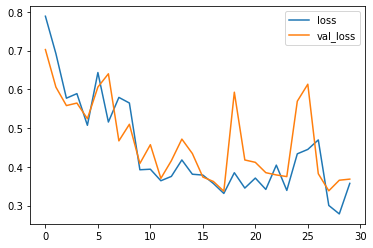

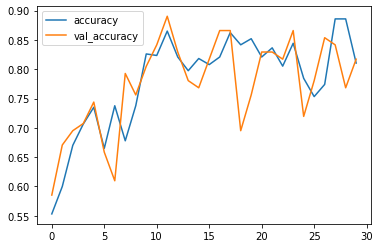

In [56]:
import pandas as pd
history_df = pd.DataFrame(vgg19_history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.show()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

### MODEL EVALUATION

In [58]:
train_accuracy = vgg19_model.evaluate(train_set)
print("Training Accuracy of VGG16:", train_accuracy)

test_accuracy = vgg19_model.evaluate(test_set)
print("Testing Accuracy of VGG16:", test_accuracy)

13/13 [==============================] - 84s 7s/step - loss: 0.3003 - accuracy: 0.8649
Training Accuracy of VGG16: [0.3002861440181732, 0.864935040473938]
3/3 [==============================] - 19s 6s/step - loss: 0.4150 - accuracy: 0.8000
Testing Accuracy of VGG16: [0.41503816843032837, 0.800000011920929]


In [59]:
df = pd.DataFrame(zip(train_accuracy,test_accuracy),columns=['Train','Test'], index=['loss','Accuracy'])
df

Train      Test
loss      0.300286  0.415038
Accuracy  0.864935  0.800000

### PREDICTION ON TEST DATA

In [61]:
y_hat_vgg19 = vgg19_model.predict(test_set)

3/3 [==============================] - 15s 5s/step


In [63]:
y_hat_vgg19

array([[8.35031737e-04, 9.99076426e-01],
       [8.83354768e-02, 8.96955371e-01],
       [1.14469745e-04, 9.99886096e-01],
       [2.27885582e-02, 9.71304655e-01],
       [4.38024908e-01, 6.01958632e-01],
       [5.87463304e-02, 9.31779623e-01],
       [1.43738195e-01, 8.28765810e-01],
       [3.07236910e-02, 9.65931416e-01],
       [2.88213138e-02, 9.70426798e-01],
       [5.98231964e-02, 9.31181252e-01],
       [9.27539193e-04, 9.99011815e-01],
       [1.39672831e-02, 9.83999968e-01],
       [5.84531650e-02, 9.36597645e-01],
       [4.50554378e-02, 9.48592484e-01],
       [4.79133613e-02, 9.42790270e-01],
       [8.75814166e-03, 9.90244627e-01],
       [6.29289269e-01, 3.53599876e-01],
       [9.07463431e-02, 8.88741016e-01],
       [7.45390594e-01, 2.34528109e-01],
       [2.36018002e-02, 9.73867297e-01],
       [9.70588773e-02, 8.81833315e-01],
       [5.47439642e-02, 9.44857001e-01],
       [1.80134699e-01, 8.09109151e-01],
       [9.80600119e-01, 1.82928760e-02],
       [1.588947

### LOAD MODEL & MAKE SOME PREDICTION

In [69]:
from tensorflow.keras.models import load_model

model2 = load_model('vgg16_model.h5')

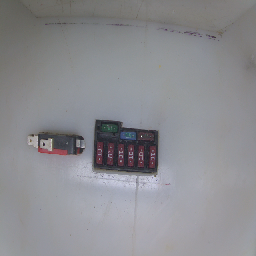

In [88]:
# Load image
img1 = image.load_img(r"C:\Users\hp\Downloads\Task\subset\test\okPositionFuse\marj274.png",target_size=(256,256))
img1

In [89]:
arr = image.img_to_array(img1)
arr

array([[[ 98.,  96.,  88.],
        [ 98.,  96.,  90.],
        [ 92.,  97.,  91.],
        ...,
        [130., 132., 132.],
        [127., 132., 128.],
        [127., 130., 129.]],

       [[ 97.,  95.,  91.],
        [ 94.,  98.,  92.],
        [ 93.,  96.,  91.],
        ...,
        [129., 130., 132.],
        [127., 129., 131.],
        [125., 129., 128.]],

       [[ 98.,  96.,  90.],
        [ 94.,  99.,  93.],
        [ 97.,  98.,  91.],
        ...,
        [126., 130., 131.],
        [128., 128., 128.],
        [126., 128., 130.]],

       ...,

       [[155., 157., 159.],
        [153., 157., 160.],
        [157., 155., 160.],
        ...,
        [153., 158., 157.],
        [151., 155., 155.],
        [147., 150., 154.]],

       [[155., 156., 160.],
        [156., 154., 159.],
        [153., 157., 162.],
        ...,
        [151., 157., 159.],
        [149., 153., 152.],
        [147., 149., 149.]],

       [[154., 155., 159.],
        [157., 156., 159.],
        [157., 1

In [90]:
arr = arr/255
arr

array([[[0.38431373, 0.3764706 , 0.34509805],
        [0.38431373, 0.3764706 , 0.3529412 ],
        [0.36078432, 0.38039216, 0.35686275],
        ...,
        [0.50980395, 0.5176471 , 0.5176471 ],
        [0.49803922, 0.5176471 , 0.5019608 ],
        [0.49803922, 0.50980395, 0.5058824 ]],

       [[0.38039216, 0.37254903, 0.35686275],
        [0.36862746, 0.38431373, 0.36078432],
        [0.3647059 , 0.3764706 , 0.35686275],
        ...,
        [0.5058824 , 0.50980395, 0.5176471 ],
        [0.49803922, 0.5058824 , 0.5137255 ],
        [0.49019608, 0.5058824 , 0.5019608 ]],

       [[0.38431373, 0.3764706 , 0.3529412 ],
        [0.36862746, 0.3882353 , 0.3647059 ],
        [0.38039216, 0.38431373, 0.35686275],
        ...,
        [0.49411765, 0.50980395, 0.5137255 ],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.49411765, 0.5019608 , 0.50980395]],

       ...,

       [[0.60784316, 0.6156863 , 0.62352943],
        [0.6       , 0.6156863 , 0.627451  ],
        [0.6156863 , 0

In [91]:
# Expand the diamension
arr = np.expand_dims(arr, axis=0)
imgdata= preprocess_input(arr)

# Prediction
model2.predict(imgdata)

1/1 [==============================] - 0s 209ms/step


array([[2.6554253e-04, 9.9539405e-01]], dtype=float32)

In [92]:
img_pred = np.argmax(model.predict(img_data),axis=1)
print("Prediction:",img_pred)

1/1 [==============================] - 0s 207ms/step
Prediction: [1]


### VGG19 Pre-Trained Model Prediction

1/1 [==============================] - 0s 271ms/step


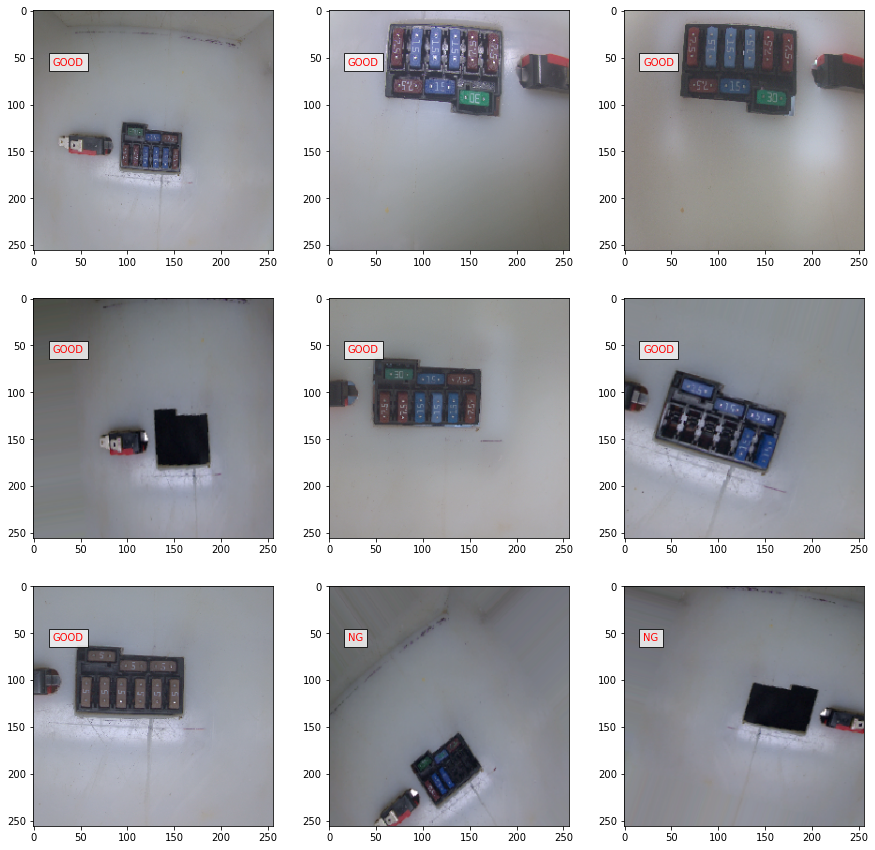

In [85]:
# Visualise the prediction of the model
imgs, labels = next(test_set)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
class_names = ['NG','GOOD']
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model2.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

* Here also model doing some wrong predictions beacuse classes is imbalanced.

### CNN Model Prediction

1/1 [==============================] - 0s 43ms/step


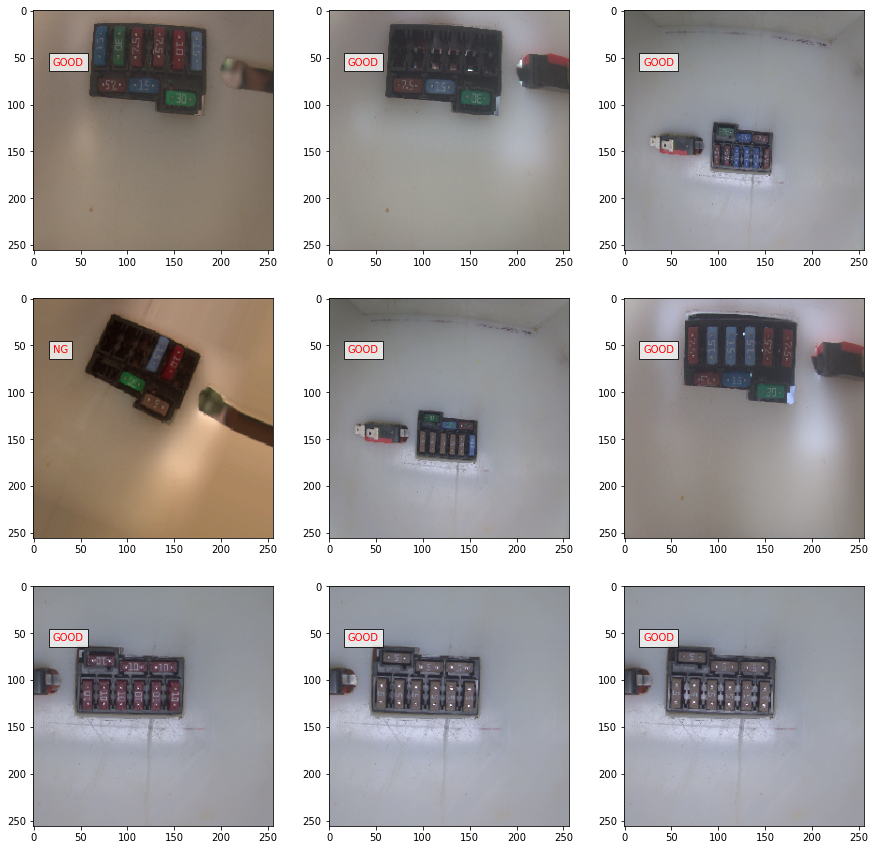

In [87]:
# Visualise the prediction of the model
imgs, labels = next(test_set)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
class_names = ['NG','GOOD']
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model1.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

* CNN model also predict wrong prediction some time.